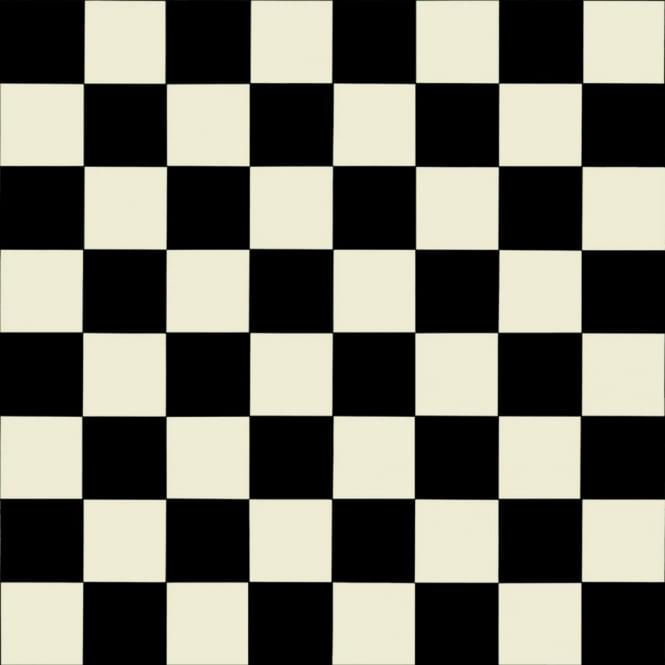

In [1]:
import numpy as np
from PIL import Image as image
from IPython.display import Image, display
from io import BytesIO

img = np.array(image.open('chess.jpg'))
f = BytesIO()
image.fromarray(img.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

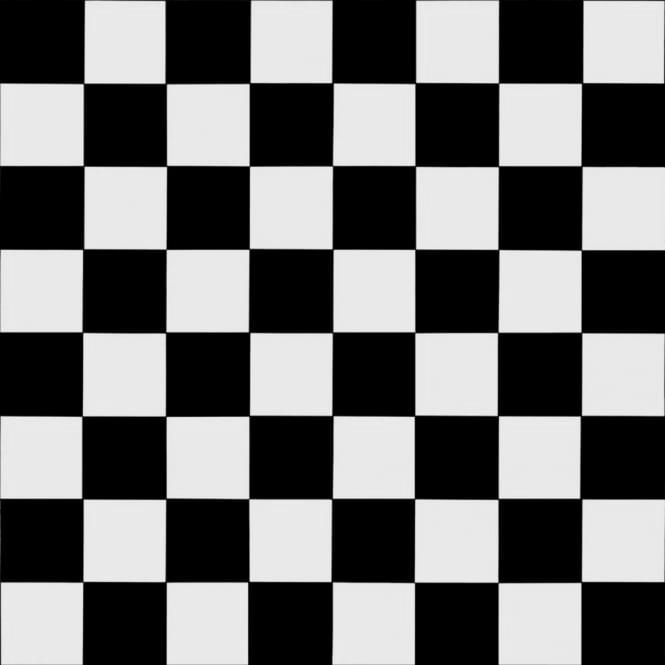

In [2]:
gray = np.zeros((img.shape[0], img.shape[1]))

for i in range(len(img)):
    for j in range(len(img[i])):
        gray[i][j] = 0.299*img[i][j][0] + 0.587*img[i][j][1] + 0.114*img[i][j][2]

f = BytesIO()
image.fromarray(gray.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

In [4]:
### x sobel derivative ###
sobel_kernel_x = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])
I_x = np.zeros((img.shape[0]-2, img.shape[1]-2))

for i in range(img.shape[0]-2):
    for j in range(img.shape[1]-2):
        I_x[i][j] = np.sum(np.multiply(gray[i:i+3, j:j+3], sobel_kernel_x))

In [5]:
### y sobel derivative ###

sobel_kernel_y = np.array([[-1, -2, -1],
                         [0, 0, 0],
                         [1, 2, 1]])
I_y = np.zeros((img.shape[0]-2, img.shape[1]-2))

for i in range(img.shape[0]-2):
    for j in range(img.shape[1]-2):
        I_y[i][j] = np.sum(np.multiply(gray[i:i+3, j:j+3], sobel_kernel_y))

In [6]:
I_x2 = I_x*I_x
I_y2 = I_y*I_y
I_xy = I_x*I_y

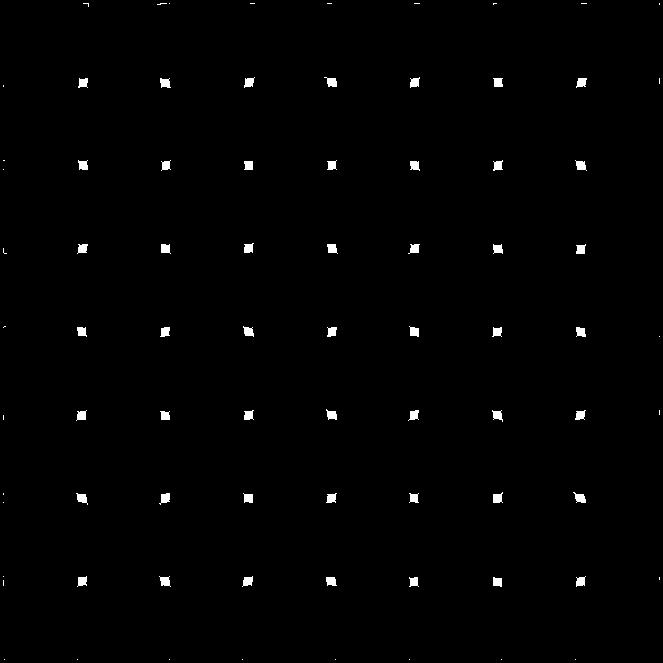

In [7]:
k = 0.06
offset = 3
cornerDetected = np.zeros((I_xy.shape[0], I_xy.shape[1]))
for i in range(offset, I_xy.shape[0]-offset):
    for j in range(offset, I_xy.shape[1]-offset):
        
        Ixx = I_x2[i-offset:i+offset+1, j-offset:j+offset+1]
        Iyy = I_y2[i-offset:i+offset+1, j-offset:j+offset+1]
        Ixy = I_xy[i-offset:i+offset+1, j-offset:j+offset+1]
        
        Sxx = Ixx.sum()
        Syy = Iyy.sum()
        Sxy = Ixy.sum()
        
        det = Sxx*Syy - Sxy**2
        trace = Sxx+Syy
        r = det - k*(trace**2)
        
        if r > 100000000:
            #print("HI")
            cornerDetected[i][j] = 255

f = BytesIO()
image.fromarray(cornerDetected.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

In [ ]:
## Need to find optimal values of k, offset and threshold for r